# PCManifold class tutorial: Diffusion Maps

We use the PCManifold class to compute a diffusion map of the swissroll manifold.

In [1]:
# import all necessary packages
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

%matplotlib inline

from sklearn.datasets import make_swiss_roll, make_s_curve
from sklearn.decomposition import PCA
import sklearn.manifold as manifold

import datafold.dynfold as dfold
import datafold.pcfold as pfold

np.random.seed(5)

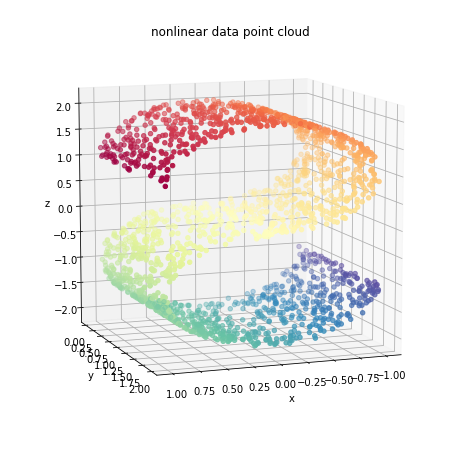

In [2]:
nr_samples = 20000

fig = plt.figure(figsize=(8, 8))

# generating the nonlinear dataset 
nonlinear_data, color_nonlinear = make_s_curve(nr_samples, noise=0)  # using scikit learn package


plot_idx= np.random.permutation(nr_samples)[0:2000]
ax = fig.add_subplot(111, projection="3d")
ax.scatter(nonlinear_data[plot_idx, 0], nonlinear_data[plot_idx, 1], nonlinear_data[plot_idx, 2],
           c=color_nonlinear[plot_idx], cmap=plt.cm.Spectral) 
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_title("nonlinear data point cloud");
ax.view_init(10,70)


0.1902206201129981
0.40994389979001344


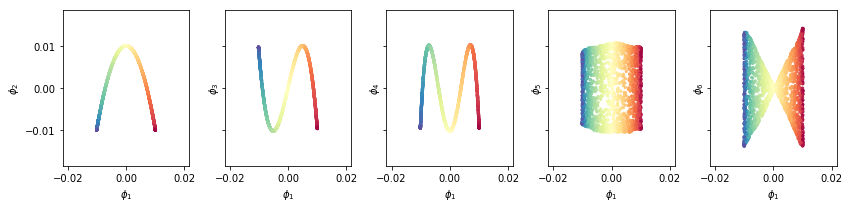

In [7]:
# Construct the PCManifold, estimate parameters, run diffusion maps.

pcm = pfold.PCManifold(nonlinear_data)
pcm.optimize_parameters()

print(pcm.kernel.epsilon)
print(pcm.cut_off)

dmap = dfold.DiffusionMaps(epsilon=pcm.kernel.epsilon, cut_off=pcm.cut_off, n_eigenpairs=10)
dmap = dmap.fit(pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

fig,ax = plt.subplots(1,5,figsize=(12, 3),sharey=True)
for k in range(len(ax)):
    ax[k].scatter(evecs[plot_idx, 1], evecs[plot_idx,2+k],s=5, c=color_nonlinear[plot_idx], cmap=plt.cm.Spectral) 
    ax[k].set_xlabel(r"$\phi_1$"); ax[k].set_ylabel(r"$\phi_%g$" % (k+2));
fig.tight_layout()